In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.signal import savgol_filter

In [2]:
import pickle

file_path = "/home/cl/Dropbox/Codes/python/current/200501NIOS.pkl"
with open(file_path, 'rb') as f:
    data = pickle.load(f)

In [3]:
import pickle
with open('/home/cl/Dropbox/Codes/python/wind/CTD20501.pkl', 'rb') as f:
    CTD200501 = pickle.load(f)

In [4]:
import pickle
with open("/home/cl/Dropbox/Codes/python/wind/200501sst.pkl", "rb") as f:
    dataSST = pickle.load(f)

In [5]:
def extract_circle(matrix, x0, y0, radius):
    """
    Extract values inside a circle of given radius from a 2D matrix.

    Parameters:
        matrix (2D numpy array): input data
        x0, y0 (int): center coordinates (row, col)
        radius (float): circle radius (in grid cells)

    Returns:
        circle_values (1D array): values inside the circle
        mask (2D boolean array): True inside the circle
    """
    nrows, ncols = matrix.shape
    
    # Create coordinate grid
    y, x = np.ogrid[:nrows, :ncols]
    
    # Distance from center
    dist = np.sqrt((x - y0)**2 + (y - x0)**2)
    
    # Mask of circle
    mask = dist <= radius
    
    # Extract values
    circle_values = matrix[mask]
    
    return circle_values, mask

/tmp/ipykernel_48793/2551490003.py:2: RuntimeWarning: Mean of empty slice
  plt.pcolor(dataSST['LON'], dataSST['LAT'], np.nanmean(dataSST['SST2005'], axis = 2), cmap = 'jet', vmin = 12, vmax = 17)


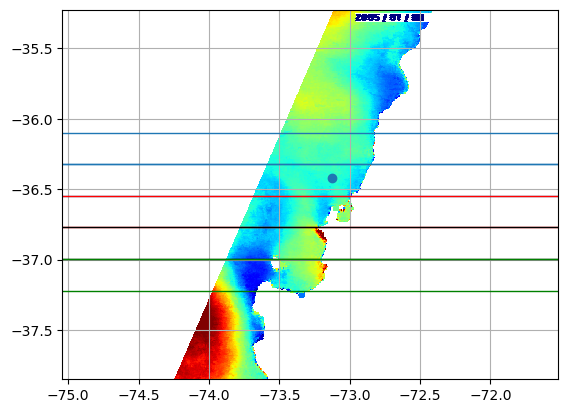

In [6]:
plt.figure()
plt.pcolor(dataSST['LON'], dataSST['LAT'], np.nanmean(dataSST['SST2005'], axis = 2), cmap = 'jet', vmin = 12, vmax = 17)
plt.plot(-73.126, -36.42, marker = 'o')
plt.axis('equal')

plt.axhline(dataSST['LAT'][1,390], linewidth = 1)
plt.axhline(dataSST['LAT'][1,340], linewidth = 1)

plt.axhline(dataSST['LAT'][1,340], linewidth = 1)
plt.axhline(dataSST['LAT'][1,290], linewidth = 1)

plt.axhline(dataSST['LAT'][1,290], color = 'red', linewidth = 1)
plt.axhline(dataSST['LAT'][1,240], color = 'red', linewidth = 1)

plt.axhline(dataSST['LAT'][1,240], color = 'k', linewidth = 1)
plt.axhline(dataSST['LAT'][1,190], color = 'k', linewidth = 1)

plt.axhline(dataSST['LAT'][1,190], color = 'g', linewidth = 1)
plt.axhline(dataSST['LAT'][1,140], color = 'g', linewidth = 1)

plt.grid()

/tmp/ipykernel_48793/3045783697.py:1: RuntimeWarning: Mean of empty slice
  plt.plot(dataSST['LON'][11:141,290], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,340:390,:], axis = 1), axis = 1), label = 'L0')#, linewidth = 2, color = 'r')
/tmp/ipykernel_48793/3045783697.py:2: RuntimeWarning: Mean of empty slice
  plt.plot(dataSST['LON'][11:141,290], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,290:340,:], axis = 1), axis = 1), label = 'L1')#, linewidth = 2, color = 'r')
/tmp/ipykernel_48793/3045783697.py:3: RuntimeWarning: Mean of empty slice
  plt.plot(dataSST['LON'][11:141,240], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,240:290,:], axis = 1), axis = 1), label = 'L2')#, linewidth = 2, color = 'r')
/tmp/ipykernel_48793/3045783697.py:4: RuntimeWarning: Mean of empty slice
  plt.plot(dataSST['LON'][11:141,190], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,190:240,:], axis = 1), axis = 1), label = 'L3')#, linewidth = 2, color = 'r')
/tmp/ipykernel_48793/3045783697.py:5: Runtim

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


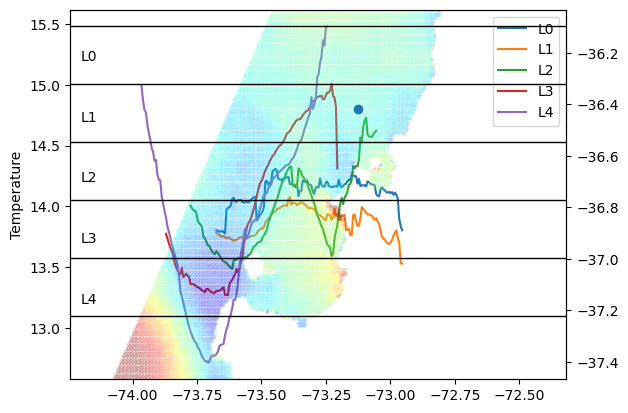

In [7]:
plt.plot(dataSST['LON'][11:141,290], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,340:390,:], axis = 1), axis = 1), label = 'L0')#, linewidth = 2, color = 'r')
plt.plot(dataSST['LON'][11:141,290], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,290:340,:], axis = 1), axis = 1), label = 'L1')#, linewidth = 2, color = 'r')
plt.plot(dataSST['LON'][11:141,240], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,240:290,:], axis = 1), axis = 1), label = 'L2')#, linewidth = 2, color = 'r')
plt.plot(dataSST['LON'][11:141,190], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,190:240,:], axis = 1), axis = 1), label = 'L3')#, linewidth = 2, color = 'r')
plt.plot(dataSST['LON'][11:141,140], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,140:190,:], axis = 1), axis = 1), label = 'L4')#, linewidth = 2, color = 'r')
plt.text(-74.2,15.2,'L0')
plt.text(-74.2,15.2-0.5,'L1')
plt.text(-74.2,15.2-1,'L2')
plt.text(-74.2,15.2-1.5,'L3')
plt.text(-74.2,15.2-2,'L4')
plt.ylabel('Temperature')
plt.legend()
plt.twinx()

plt.pcolor(dataSST['LON'], dataSST['LAT'], np.nanmean(dataSST['SST2005'], axis = 2), cmap = 'jet', vmin = 12, vmax = 17, alpha = 0.1)
plt.axis('equal')
plt.ylim([-37.5, -36])
plt.axhline(dataSST['LAT'][1,390], linewidth = 1, color = 'k')
plt.axhline(dataSST['LAT'][1,340], linewidth = 1, color = 'k')
plt.axhline(dataSST['LAT'][1,290], linewidth = 1, color = 'k')
plt.axhline(dataSST['LAT'][1,240], linewidth = 1, color = 'k')
plt.axhline(dataSST['LAT'][1,190], linewidth = 1, color = 'k')
plt.axhline(dataSST['LAT'][1,140], linewidth = 1, color = 'k')
plt.plot(-73.126, -36.42, marker = 'o')

In [8]:
xz = np.full((31, 1), np.nan)

for i in range(0,31):
    dataX = dataSST['SST2005'][:,:,i]
    x0, y0 = 50, 320   # center
    radius = 40
    values, mask = extract_circle(dataX, x0, y0, radius)
    xz[i] = np.nanmean(values)
    del values, mask

dataX = np.nanmean(dataSST['SST2005'], axis = 2)
values_1, mask_1 = extract_circle(dataX, x0, y0, radius)
masked_1= np.where(mask_1, dataX, np.nan)
del values_1, mask_1, dataX, x0, y0, radius

/tmp/ipykernel_48793/4242731730.py:8: RuntimeWarning: Mean of empty slice
  xz[i] = np.nanmean(values)
/tmp/ipykernel_48793/4242731730.py:11: RuntimeWarning: Mean of empty slice
  dataX = np.nanmean(dataSST['SST2005'], axis = 2)


In [9]:
xz1 = np.full((31, 1), np.nan)

for i in range(0,31):
    dataX = dataSST['SST2005'][:,:,i]
    x0, y0 = 100, 270
    radius = 50
    values, mask = extract_circle(dataX, x0, y0, radius)
    xz1[i] = np.nanmean(values)

dataX = np.nanmean(dataSST['SST2005'], axis = 2)
values_2, mask_2 = extract_circle(dataX, x0, y0, radius)
masked_2 = np.where(mask_2, dataX, np.nan)
del values_2, mask_2, dataX, x0, y0, radius

/tmp/ipykernel_48793/646940653.py:8: RuntimeWarning: Mean of empty slice
  xz1[i] = np.nanmean(values)
/tmp/ipykernel_48793/646940653.py:10: RuntimeWarning: Mean of empty slice
  dataX = np.nanmean(dataSST['SST2005'], axis = 2)


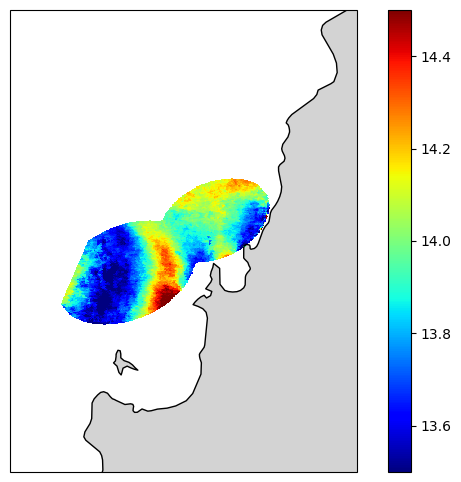

In [10]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

lon = np.linspace(-75, -70, 100)
lat = np.linspace(-40, -30, 100)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(8,6))

plt.pcolor(dataSST['LON'], dataSST['LAT'], masked_1, cmap = 'jet', vmin = 13.5, vmax = 14.5)
plt.pcolor(dataSST['LON'], dataSST['LAT'], masked_2, cmap = 'jet', vmin = 13.5, vmax = 14.5)
plt.colorbar()
ax.coastlines(resolution="10m", color="black", linewidth=1)
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.set_extent([-74, -72.5, -37.5, -35.5], crs=ccrs.PlateCarree())

/tmp/ipykernel_48793/2607907268.py:10: RuntimeWarning: Mean of empty slice
  xz3[i] = np.nanmean(values)
/tmp/ipykernel_48793/2607907268.py:12: RuntimeWarning: Mean of empty slice
  dataX = np.nanmean(dataSST['SST2005'], axis = 2)


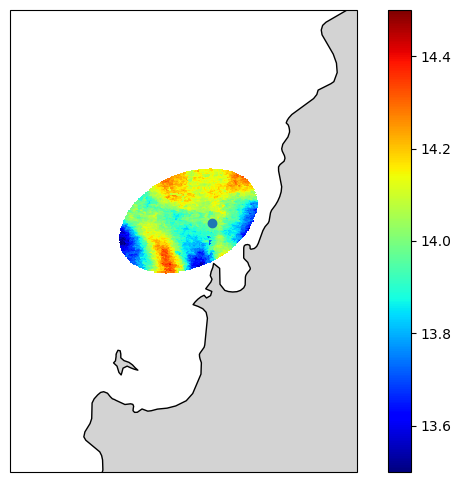

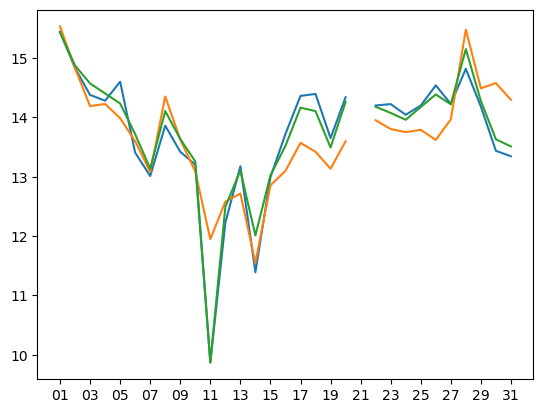

In [11]:
import matplotlib.dates as mdates
dates = pd.date_range(start="2005-01-01", end="2005-01-31", freq="D")
xz3 = np.full((31, 1), np.nan)

for i in range(0,31):
    dataX = dataSST['SST2005'][:,:,i]
    x0, y0 = 70, 320
    radius = 50
    values, mask = extract_circle(dataX, x0, y0, radius)
    xz3[i] = np.nanmean(values)

dataX = np.nanmean(dataSST['SST2005'], axis = 2)
values_3, mask_3 = extract_circle(dataX, x0, y0, radius)
masked_3 = np.where(mask_3, dataX, np.nan)
del values_3, mask_3, dataX, x0, y0, radius


lon = np.linspace(-75, -70, 100)
lat = np.linspace(-40, -30, 100)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(8,6))

plt.pcolor(dataSST['LON'], dataSST['LAT'], masked_3, cmap = 'jet', vmin = 13.5, vmax = 14.5)
plt.colorbar()
ax.coastlines(resolution="10m", color="black", linewidth=1)
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.set_extent([-74, -72.5, -37.5, -35.5], crs=ccrs.PlateCarree())
plt.plot(-73.126, -36.42, marker = 'o')

plt.figure()
plt.plot(dates, xz)
plt.plot(dates, xz1)
plt.plot(dates, xz3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

/tmp/ipykernel_48793/3825523839.py:4: RuntimeWarning: Mean of empty slice
  plt.plot(dataSST['LON'][11:141,290], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,340:390,:], axis = 1), axis = 1), label = 'L0')#, linewidth = 2, color = 'r')
/tmp/ipykernel_48793/3825523839.py:5: RuntimeWarning: Mean of empty slice
  plt.plot(dataSST['LON'][11:141,290], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,290:340,:], axis = 1), axis = 1), label = 'L1')#, linewidth = 2, color = 'r')
/tmp/ipykernel_48793/3825523839.py:6: RuntimeWarning: Mean of empty slice
  plt.plot(dataSST['LON'][11:141,240], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,240:290,:], axis = 1), axis = 1), label = 'L2')#, linewidth = 2, color = 'r')
/tmp/ipykernel_48793/3825523839.py:7: RuntimeWarning: Mean of empty slice
  plt.plot(dataSST['LON'][11:141,190], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,190:240,:], axis = 1), axis = 1), label = 'L3')#, linewidth = 2, color = 'r')
/tmp/ipykernel_48793/3825523839.py:8: Runtim

Text(2005-01-20 00:00:00, 12, 'C')

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


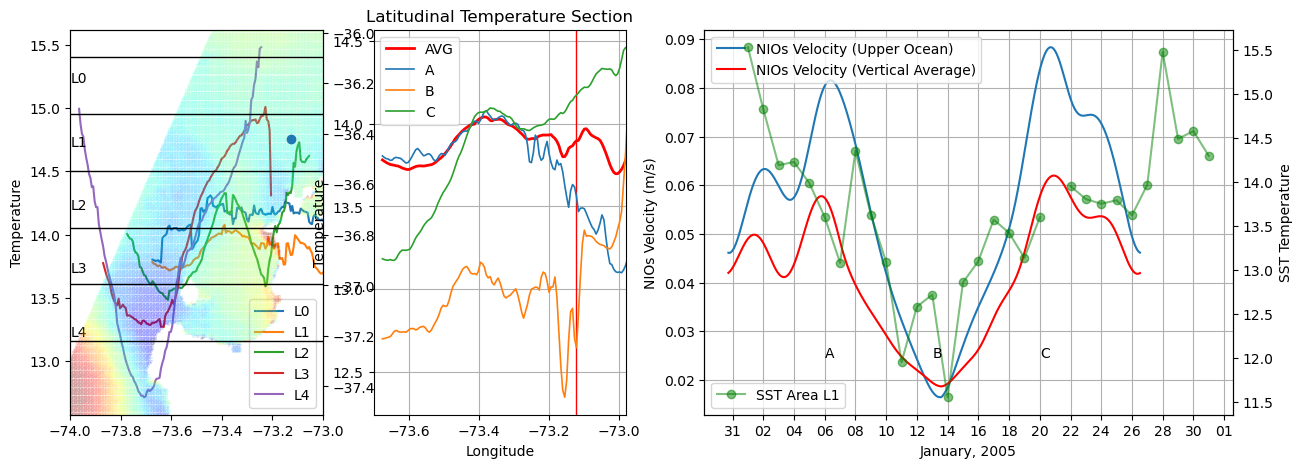

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)

plt.plot(dataSST['LON'][11:141,290], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,340:390,:], axis = 1), axis = 1), label = 'L0')#, linewidth = 2, color = 'r')
plt.plot(dataSST['LON'][11:141,290], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,290:340,:], axis = 1), axis = 1), label = 'L1')#, linewidth = 2, color = 'r')
plt.plot(dataSST['LON'][11:141,240], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,240:290,:], axis = 1), axis = 1), label = 'L2')#, linewidth = 2, color = 'r')
plt.plot(dataSST['LON'][11:141,190], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,190:240,:], axis = 1), axis = 1), label = 'L3')#, linewidth = 2, color = 'r')
plt.plot(dataSST['LON'][11:141,140], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,140:190,:], axis = 1), axis = 1), label = 'L4')#, linewidth = 2, color = 'r')
plt.text(-74,15.2,'L0')
plt.text(-74,15.2-0.5,'L1')
plt.text(-74,15.2-1,'L2')
plt.text(-74,15.2-1.5,'L3')
plt.text(-74,15.2-2,'L4')
plt.ylabel('Temperature')
plt.legend()
plt.twinx()

plt.pcolor(dataSST['LON'], dataSST['LAT'], np.nanmean(dataSST['SST2005'], axis = 2), cmap = 'jet', vmin = 12, vmax = 17, alpha = 0.1)
plt.axis('equal')
plt.ylim([-37.5, -36])
plt.axhline(dataSST['LAT'][1,390], linewidth = 1, color = 'k')
plt.axhline(dataSST['LAT'][1,340], linewidth = 1, color = 'k')
plt.axhline(dataSST['LAT'][1,290], linewidth = 1, color = 'k')
plt.axhline(dataSST['LAT'][1,240], linewidth = 1, color = 'k')
plt.axhline(dataSST['LAT'][1,190], linewidth = 1, color = 'k')
plt.axhline(dataSST['LAT'][1,140], linewidth = 1, color = 'k')
plt.plot(-73.126, -36.42, marker = 'o')
plt.xlim([-74,-73])
#--------------------------

plt.subplot(1,4,2)
plt.axvline(-73.1224, color = 'r', linewidth = 1)
#z = np.nanmean(np.nanmean(dataSST['SST2005'][10:141,290:340,:], axis = 1), axis = 1)
plt.plot(dataSST['LON'][15:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][15:141,290:340,:], axis = 1), axis = 1),10,2), linewidth = 2, color = 'r',label = 'AVG')
plt.plot(dataSST['LON'][15:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][15:141,290:340,3:9], axis = 1), axis = 1),6,2), linewidth = 1.2,label = 'A')
plt.plot(dataSST['LON'][15:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][15:141,290:340,10:16], axis = 1), axis = 1),6,2), linewidth = 1.2,label = 'B')
plt.plot(dataSST['LON'][15:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][15:141,290:340,17:23], axis = 1), axis = 1),6,2), linewidth = 1.2,label = 'C')

plt.xlim([-73.7, -72.98])
plt.ylabel('Temperature'), plt.xlabel('Longitude')
plt.grid()
plt.title('Latitudinal Temperature Section')
plt.legend(loc = 'upper left')
plt.subplot(1,2,2)
speed = np.sqrt(data['cvo_NIOSnegDATA'].real**2 + data['cvo_NIOSnegDATA'].imag**2)
plt.plot(data['time']['datetime'], np.nanmean(speed[:,16:21], axis = 1)/1000,  label = 'NIOs Velocity (Upper Ocean)')
plt.plot(data['time']['datetime'], np.nanmean(speed, axis = 1)/1000, color = 'r',  label = 'NIOs Velocity (Vertical Average)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.ylabel('NIOs Velocity (m/s)')
plt.xlabel('January, 2005')
plt.grid()
plt.legend()
plt.twinx()

dates = pd.date_range(start="2005-01-01", end="2005-01-31", freq="D")
#plt.plot(dates, xz)
plt.plot(dates, xz1, color = 'green', marker = 'o', alpha = 0.5,  label = 'SST Area L1')
plt.ylabel('SST Temperature')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

plt.text(pd.to_datetime("2005-01-6"),12,'A')
plt.text(pd.to_datetime("2005-01-13"),12,'B')
plt.text(pd.to_datetime("2005-01-20"),12,'C')

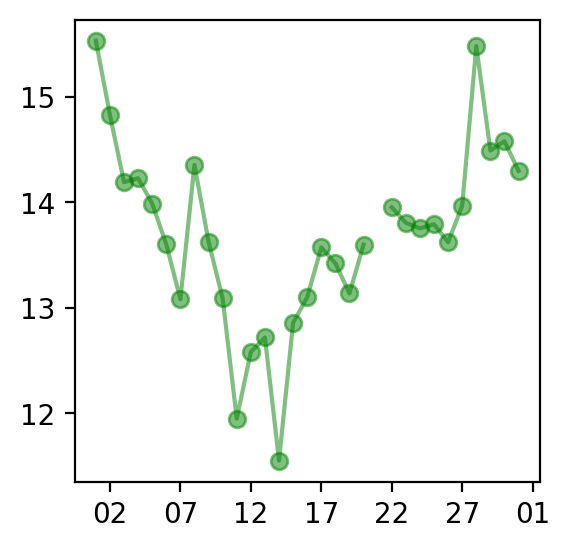

In [50]:
plt.figure(figsize=(3,3))
plt.plot(dates, xz1, color = 'green', marker = 'o', alpha = 0.5,  label = 'SST Area L1')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

In [55]:
dates

DatetimeIndex(['2005-01-01', '2005-01-02', '2005-01-03', '2005-01-04',
               '2005-01-05', '2005-01-06', '2005-01-07', '2005-01-08',
               '2005-01-09', '2005-01-10', '2005-01-11', '2005-01-12',
               '2005-01-13', '2005-01-14', '2005-01-15', '2005-01-16',
               '2005-01-17', '2005-01-18', '2005-01-19', '2005-01-20',
               '2005-01-21', '2005-01-22', '2005-01-23', '2005-01-24',
               '2005-01-25', '2005-01-26', '2005-01-27', '2005-01-28',
               '2005-01-29', '2005-01-30', '2005-01-31'],
              dtype='datetime64[ns]', freq='D')

In [56]:
dfSST200501 = pd.DataFrame({
    'datetime': dates,
    'velocity': xz1.flatten()
}).set_index('datetime')

In [58]:
dfSST200501 = dfSST200501.interpolate(method='linear')

In [59]:
dfSST200501 = dfSST200501.resample('1h').interpolate(method='linear')

In [61]:
dfSST200501.to_csv('SST20050_v2.csv', index=True)

In [25]:
import pandas as pd
dfTidbit = pd.read_csv('/home/cl/Dropbox/16tb/research_codes/temp/200501/tidbit.csv')
depth_dfTidbit = [ 6,  7, 11, 13, 15, 17, 19, 21, 23, 27, 34, 37, 47, 57, 67, 87, 97]

In [32]:
dfTidbit = dfTidbit.set_index(pd.to_datetime(dfTidbit.iloc[:, 0]))

In [35]:
dfTidbit = dfTidbit.drop(dfTidbit.columns[0], axis=1)

In [37]:
dfTidbit

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17
datetime,,,,,,,,,,,,,,,,,
2005-01-16,12.577786,12.475542,12.076323,12.061385,12.048948,12.086265,11.998021,11.994104,11.783677,11.648346,11.164031,11.055769,10.814030,10.759360,10.733754,10.696300,10.565508
2005-01-17,12.925567,13.041385,12.417302,12.240052,12.111358,12.097961,11.872837,11.785490,11.506042,11.319601,10.985566,10.862494,10.740035,10.695770,10.709685,10.735836,10.592287
2005-01-18,13.456626,13.299295,12.379326,12.217174,12.075990,11.912064,11.778326,11.658392,11.364014,11.046442,10.871365,10.834761,10.797864,10.817762,10.735072,10.722711,10.568468
2005-01-19,13.065641,12.962719,12.786979,12.581003,12.299875,12.064760,11.563069,11.339434,11.075760,10.984813,10.842403,10.828802,10.829522,10.870928,10.839753,10.765561,10.632181
2005-01-20,13.111593,13.073007,12.834351,12.661917,12.354351,12.081944,11.725170,11.562111,11.271292,11.041174,10.916802,10.909474,10.926440,10.920811,10.909777,10.825978,10.680307
2005-01-21,13.442139,13.374115,12.856663,12.525132,12.227198,11.963148,11.713542,11.565316,11.266163,11.058063,10.987358,10.994760,10.983886,10.999433,10.954197,10.869156,10.703050
2005-01-22,13.376611,13.308604,13.046368,12.894649,12.688875,12.382101,12.140389,11.960083,11.594323,11.210591,11.075406,11.043139,10.998477,11.018383,10.977763,10.884864,10.693464
2005-01-23,13.413723,13.397243,13.275851,13.269056,13.170920,12.902199,12.639045,12.369181,11.908215,11.426259,11.162840,11.059992,11.001209,11.033650,10.996370,10.914267,10.694350
2005-01-24,13.757896,13.644990,13.542615,13.512292,13.381628,13.260994,12.899000,12.628472,12.162889,11.546384,11.201184,11.093967,11.039310,11.059868,11.004527,10.953683,10.741153


/tmp/ipykernel_48793/2744721772.py:7: RuntimeWarning: Mean of empty slice
  plt.plot(dataSST['LON'][11:141,290], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,340:390,:], axis = 1), axis = 1), label = 'L0')#, linewidth = 2, color = 'r')
/tmp/ipykernel_48793/2744721772.py:8: RuntimeWarning: Mean of empty slice
  plt.plot(dataSST['LON'][11:141,290], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,290:340,:], axis = 1), axis = 1), label = 'L1', color = 'red')#, linewidth = 2, color = 'r')
/tmp/ipykernel_48793/2744721772.py:9: RuntimeWarning: Mean of empty slice
  plt.plot(dataSST['LON'][11:141,240], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,240:290,:], axis = 1), axis = 1), label = 'L2')#, linewidth = 2, color = 'r')
/tmp/ipykernel_48793/2744721772.py:10: RuntimeWarning: Mean of empty slice
  plt.plot(dataSST['LON'][11:141,190], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,190:240,:], axis = 1), axis = 1), label = 'L3')#, linewidth = 2, color = 'r')
/tmp/ipykernel_48793/2744721

Text(2005-01-23 00:00:00, 12, 'C')

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


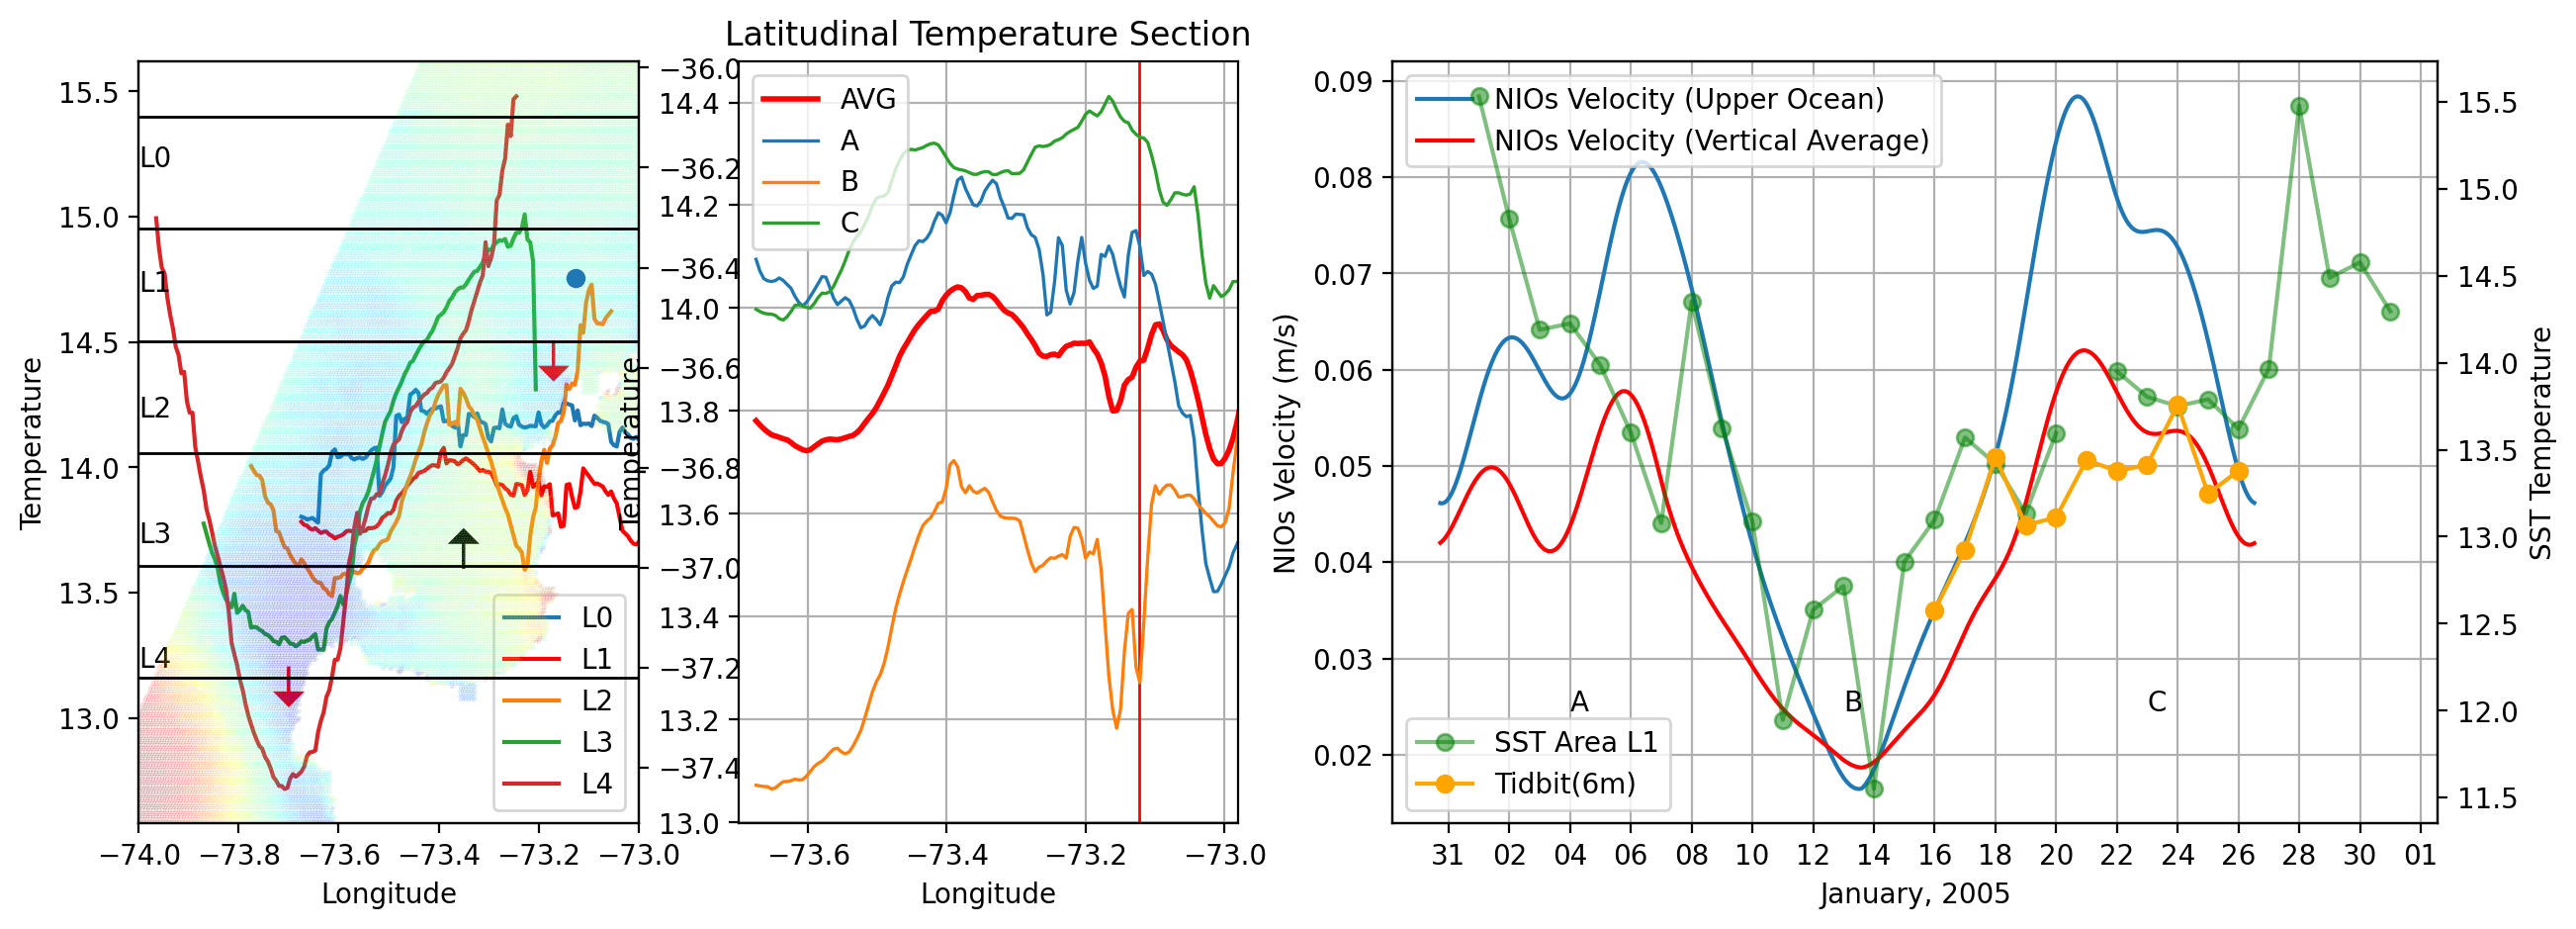

In [44]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 200

plt.figure(figsize=(15,5))
plt.subplot(1,4,1)

plt.plot(dataSST['LON'][11:141,290], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,340:390,:], axis = 1), axis = 1), label = 'L0')#, linewidth = 2, color = 'r')
plt.plot(dataSST['LON'][11:141,290], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,290:340,:], axis = 1), axis = 1), label = 'L1', color = 'red')#, linewidth = 2, color = 'r')
plt.plot(dataSST['LON'][11:141,240], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,240:290,:], axis = 1), axis = 1), label = 'L2')#, linewidth = 2, color = 'r')
plt.plot(dataSST['LON'][11:141,190], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,190:240,:], axis = 1), axis = 1), label = 'L3')#, linewidth = 2, color = 'r')
plt.plot(dataSST['LON'][11:141,140], np.nanmean(np.nanmean(dataSST['SST2005'][11:141,140:190,:], axis = 1), axis = 1), label = 'L4')#, linewidth = 2, color = 'r')
plt.text(-74,15.2,'L0')
plt.text(-74,15.2-0.5,'L1')
plt.text(-74,15.2-1,'L2')
plt.text(-74,15.2-1.5,'L3')
plt.text(-74,15.2-2,'L4')
plt.ylabel('Temperature')
plt.legend()
plt.xlabel('Longitude')


plt.arrow(-73.7, 13.2, 0, -0.15, head_width=0.05, head_length=0.05, 
          fc='red', ec='red', length_includes_head=True)

plt.arrow(-73.17, 14.5, 0, -0.15, head_width=0.05, head_length=0.05, 
          fc='red', ec='red', length_includes_head=True)

plt.arrow(-73.35, 13.6, 0, 0.15, head_width=0.05, head_length=0.05, 
          fc='k', ec='k', length_includes_head=True)

plt.twinx()

plt.pcolor(dataSST['LON'], dataSST['LAT'], np.nanmean(dataSST['SST2005'], axis = 2), cmap = 'jet', vmin = 12, vmax = 17, alpha = 0.1)
plt.axis('equal')
plt.ylim([-37.5, -36])
plt.axhline(dataSST['LAT'][1,390], linewidth = 1, color = 'k')
plt.axhline(dataSST['LAT'][1,340], linewidth = 1, color = 'k')
plt.axhline(dataSST['LAT'][1,290], linewidth = 1, color = 'k')
plt.axhline(dataSST['LAT'][1,240], linewidth = 1, color = 'k')
plt.axhline(dataSST['LAT'][1,190], linewidth = 1, color = 'k')
plt.axhline(dataSST['LAT'][1,140], linewidth = 1, color = 'k')
plt.plot(-73.126, -36.42, marker = 'o')
plt.xlim([-74,-73])
#--------------------------

plt.subplot(1,4,2)
plt.axvline(-73.1224, color = 'r', linewidth = 1)
#z = np.nanmean(np.nanmean(dataSST['SST2005'][10:141,290:340,:], axis = 1), axis = 1)
plt.plot(dataSST['LON'][15:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][15:141,290:340,:], axis = 1), axis = 1),10,2), linewidth = 2, color = 'r',label = 'AVG')
plt.plot(dataSST['LON'][15:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][15:141,290:340,1:7], axis = 1), axis = 1),6,2), linewidth = 1.2,label = 'A')
plt.plot(dataSST['LON'][15:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][15:141,290:340,7:21], axis = 1), axis = 1),6,2), linewidth = 1.2,label = 'B')
plt.plot(dataSST['LON'][15:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][15:141,290:340,21:28], axis = 1), axis = 1),6,2), linewidth = 1.2,label = 'C')

plt.xlim([-73.7, -72.98])
plt.ylabel('Temperature'), plt.xlabel('Longitude')
plt.grid()
plt.title('Latitudinal Temperature Section')
plt.legend(loc = 'upper left')

plt.subplot(1,2,2)
speed = np.sqrt(data['cvo_NIOSnegDATA'].real**2 + data['cvo_NIOSnegDATA'].imag**2)
plt.plot(data['time']['datetime'], np.nanmean(speed[:,16:21], axis = 1)/1000,  label = 'NIOs Velocity (Upper Ocean)')
plt.plot(data['time']['datetime'], np.nanmean(speed, axis = 1)/1000, color = 'r',  label = 'NIOs Velocity (Vertical Average)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.ylabel('NIOs Velocity (m/s)')
plt.xlabel('January, 2005')
plt.grid()
plt.legend()
plt.twinx()

dates = pd.date_range(start="2005-01-01", end="2005-01-31", freq="D")
#plt.plot(dates, xz)
plt.plot(dates, xz1, color = 'green', marker = 'o', alpha = 0.5,  label = 'SST Area L1')
plt.plot(dfTidbit['var1'], color = 'orange', label = 'Tidbit(6m)', marker = 'o')
plt.ylabel('SST Temperature')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

plt.text(pd.to_datetime("2005-01-4"),12,'A')
plt.text(pd.to_datetime("2005-01-13"),12,'B')
plt.text(pd.to_datetime("2005-01-23"),12,'C')

In [14]:
dataX = np.nanmean(dataSST['SST2005'][:,:,1:10], axis = 2)
x0, y0 = 50, 320   # center
x1, y1 = 100, 270   # center
radius = 40
values, mask = extract_circle(dataX, x0, y0, radius)
values1, mask1 = extract_circle(dataX, x1, y1, 50)
masked_data = np.where(mask, dataX, np.nan)
masked_data1 = np.where(mask1, dataX, np.nan)

/tmp/ipykernel_95227/4104779324.py:1: RuntimeWarning: Mean of empty slice
  dataX = np.nanmean(dataSST['SST2005'][:,:,1:10], axis = 2)


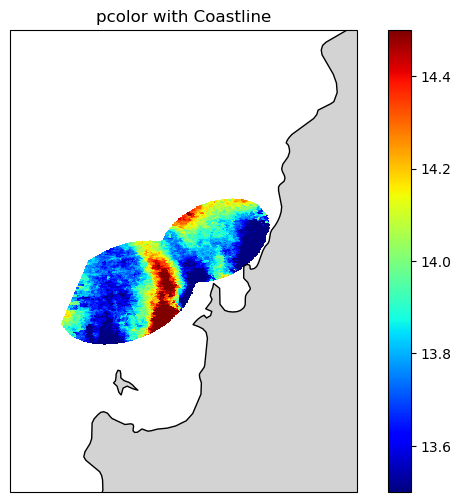

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Example grid
lon = np.linspace(-75, -70, 100)
lat = np.linspace(-40, -30, 100)
lon2d, lat2d = np.meshgrid(lon, lat)

# Fake data
data = np.sin(np.radians(lat2d)) * np.cos(np.radians(lon2d))

# Plot with Cartopy
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(8,6))

plt.pcolor(dataSST['LON'], dataSST['LAT'], masked_data, cmap = 'jet', vmin = 13.5, vmax = 14.5)
plt.pcolor(dataSST['LON'], dataSST['LAT'], masked_data1, cmap = 'jet', vmin = 13.5, vmax = 14.5)
plt.colorbar()
# Add colorbar

# Add coastlines and land
ax.coastlines(resolution="10m", color="black", linewidth=1)
ax.add_feature(cfeature.LAND, facecolor="lightgray")

# Set extent to region of interest
ax.set_extent([-74, -72.5, -37.5, -35.5], crs=ccrs.PlateCarree())

plt.title("pcolor with Coastline")
plt.show()

/tmp/ipykernel_95227/253556044.py:2: RuntimeWarning: Mean of empty slice
  plt.pcolor(np.nanmean(dataSST['SST2005'], axis = 2), cmap = 'jet', vmin = 12, vmax = 17)
/tmp/ipykernel_95227/253556044.py:8: RuntimeWarning: Mean of empty slice
  plt.pcolor(dataSST['LON'], dataSST['LAT'], np.nanmean(dataSST['SST2005'], axis = 2), cmap = 'jet', vmin = 12, vmax = 17)


(np.float64(-74.2415),
 np.float64(-72.317575),
 np.float64(-37.850750000000005),
 np.float64(-35.22475))

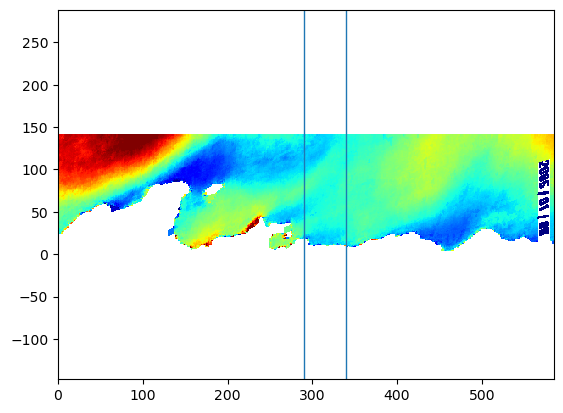

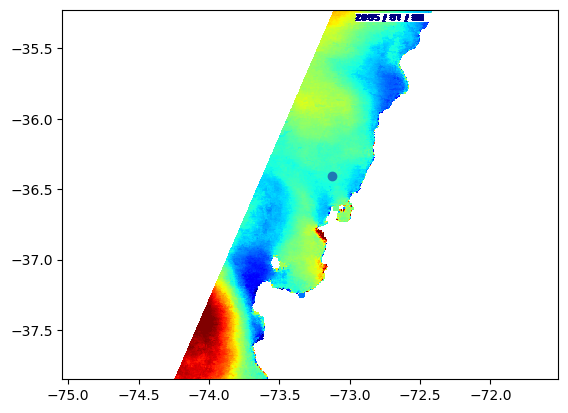

In [18]:
plt.figure()
plt.pcolor(np.nanmean(dataSST['SST2005'], axis = 2), cmap = 'jet', vmin = 12, vmax = 17)
plt.axis('equal')
plt.axvline(290, linewidth = 1)
plt.axvline(340, linewidth = 1)

plt.figure()
plt.pcolor(dataSST['LON'], dataSST['LAT'], np.nanmean(dataSST['SST2005'], axis = 2), cmap = 'jet', vmin = 12, vmax = 17)
plt.plot(-73.1224, -36.4075, marker = 'o')
plt.axis('equal')

In [7]:
dataSST['SST2005'].shape

(141, 585, 31)

In [8]:
dataSST['SST2005'][:,:,4] = np.full((141,585), np.nan)
dataSST['SST2005'][:,:,10] = np.full((141,585), np.nan)
dataSST['SST2005'][:,:,11] = np.full((141,585), np.nan)
dataSST['SST2005'][:,:,13] = np.full((141,585), np.nan)

/tmp/ipykernel_95111/2949166971.py:3: RuntimeWarning: Mean of empty slice
  plt.plot(dataSST['LON'][11:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][11:141,290:340,:], axis = 1), axis = 1),10,2), linewidth = 2, color = 'r')
/tmp/ipykernel_95111/2949166971.py:10: RuntimeWarning: Mean of empty slice
  plt.plot(dataSST['LON'][15:141,290], np.nanmean(np.nanmean(dataSST['SST2005'][15:141,290:340,idx], axis = 1), axis = 1), linewidth = 1,label = i)


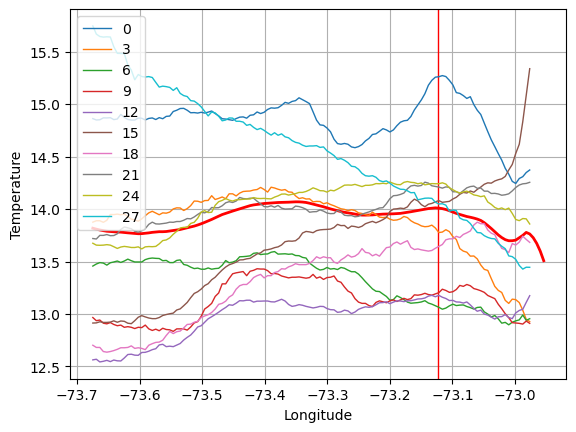

In [9]:
plt.axvline(-73.1224, color = 'r', linewidth = 1)
#z = np.nanmean(np.nanmean(dataSST['SST2005'][10:141,290:340,:], axis = 1), axis = 1)
plt.plot(dataSST['LON'][11:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][11:141,290:340,:], axis = 1), axis = 1),10,2), linewidth = 2, color = 'r')
plt.ylabel('Temperature'), plt.xlabel('Longitude')
plt.grid()

for i in range(0,30,3):
    idx = [i,i+2]
    #plt.plot(dataSST['LON'][11:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][11:141,290:340,idx], axis = 1), axis = 1),10,2), linewidth = 1)
    plt.plot(dataSST['LON'][15:141,290], np.nanmean(np.nanmean(dataSST['SST2005'][15:141,290:340,idx], axis = 1), axis = 1), linewidth = 1,label = i)

plt.legend(loc = 'upper left')

/tmp/ipykernel_94904/262036805.py:3: RuntimeWarning: Mean of empty slice
  plt.plot(dataSST['LON'][11:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][11:141,290:340,:], axis = 1), axis = 1),10,2), linewidth = 2, color = 'r')
/tmp/ipykernel_94904/262036805.py:10: RuntimeWarning: Mean of empty slice
  plt.plot(dataSST['LON'][15:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][15:141,290:340,idx], axis = 1), axis = 1),6,2), linewidth = 1.2,label = i)


Text(0.5, 1.0, 'Latitudinal Temperature Section')

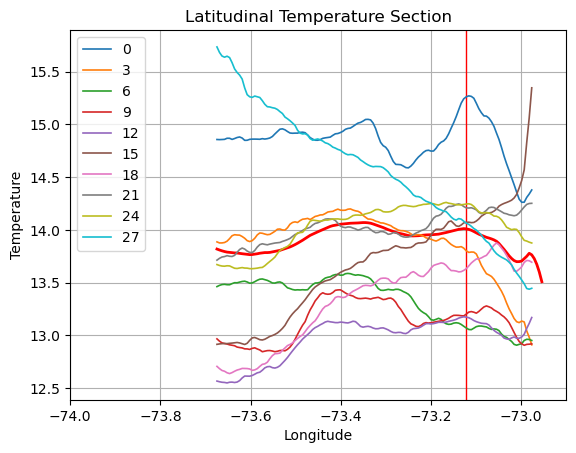

In [9]:
plt.axvline(-73.1224, color = 'r', linewidth = 1)
#z = np.nanmean(np.nanmean(dataSST['SST2005'][10:141,290:340,:], axis = 1), axis = 1)
plt.plot(dataSST['LON'][11:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][11:141,290:340,:], axis = 1), axis = 1),10,2), linewidth = 2, color = 'r')
plt.ylabel('Temperature'), plt.xlabel('Longitude')
plt.grid()

for i in range(0,30,3):
    idx = [i,i+2]
    #plt.plot(dataSST['LON'][11:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][11:141,290:340,idx], axis = 1), axis = 1),10,2), linewidth = 1)
    plt.plot(dataSST['LON'][15:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][15:141,290:340,idx], axis = 1), axis = 1),6,2), linewidth = 1.2,label = i)

plt.legend(loc = 'upper left')
plt.xlim([-74, -72.9])
plt.title('Latitudinal Temperature Section')

In [23]:
speed = np.sqrt(data['cvo_NIOSnegDATA'].real**2 + data['cvo_NIOSnegDATA'].imag**2)

/tmp/ipykernel_95227/563632631.py:5: RuntimeWarning: Mean of empty slice
  plt.plot(dataSST['LON'][15:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][15:141,290:340,:], axis = 1), axis = 1),10,2), linewidth = 2, color = 'r')
/tmp/ipykernel_95227/563632631.py:6: RuntimeWarning: Mean of empty slice
  plt.plot(dataSST['LON'][15:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][15:141,290:340,1:10], axis = 1), axis = 1),6,2), linewidth = 1.2,label = 'A')
/tmp/ipykernel_95227/563632631.py:7: RuntimeWarning: Mean of empty slice
  plt.plot(dataSST['LON'][15:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][15:141,290:340,10:20], axis = 1), axis = 1),6,2), linewidth = 1.2,label = 'B')
/tmp/ipykernel_95227/563632631.py:8: RuntimeWarning: Mean of empty slice
  plt.plot(dataSST['LON'][15:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][15:141,290:340,20:30], axis = 1), axis = 1),6,2), linewidth = 1.2,label = 'C')


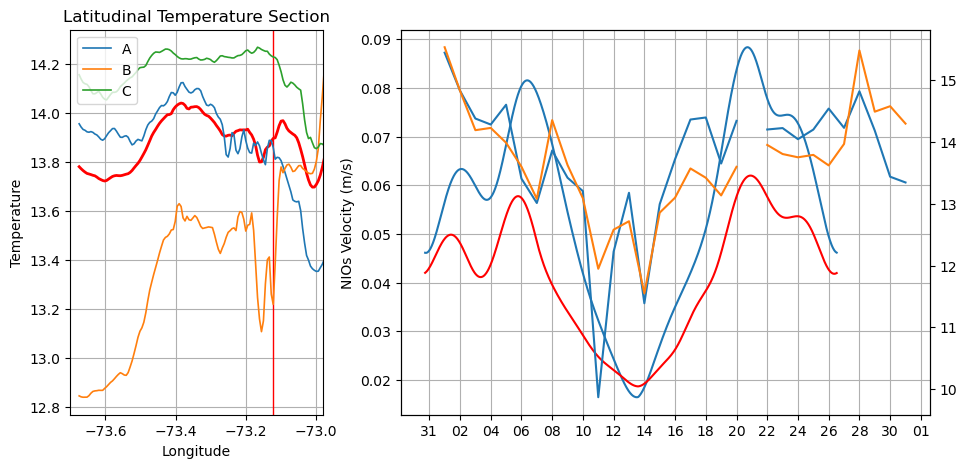

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,2)
plt.axvline(-73.1224, color = 'r', linewidth = 1)
#z = np.nanmean(np.nanmean(dataSST['SST2005'][10:141,290:340,:], axis = 1), axis = 1)
plt.plot(dataSST['LON'][15:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][15:141,290:340,:], axis = 1), axis = 1),10,2), linewidth = 2, color = 'r')
plt.plot(dataSST['LON'][15:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][15:141,290:340,1:10], axis = 1), axis = 1),6,2), linewidth = 1.2,label = 'A')
plt.plot(dataSST['LON'][15:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][15:141,290:340,10:20], axis = 1), axis = 1),6,2), linewidth = 1.2,label = 'B')
plt.plot(dataSST['LON'][15:141,290], savgol_filter(np.nanmean(np.nanmean(dataSST['SST2005'][15:141,290:340,20:30], axis = 1), axis = 1),6,2), linewidth = 1.2,label = 'C')

plt.xlim([-73.7, -72.98])
plt.ylabel('Temperature'), plt.xlabel('Longitude')
plt.grid()
plt.title('Latitudinal Temperature Section')
plt.legend(loc = 'upper left')
plt.subplot(1,2,2)
speed = np.sqrt(data['cvo_NIOSnegDATA'].real**2 + data['cvo_NIOSnegDATA'].imag**2)
plt.plot(data['time']['datetime'], np.nanmean(speed[:,16:21], axis = 1)/1000)
plt.plot(data['time']['datetime'], np.nanmean(speed, axis = 1)/1000, color = 'r')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.ylabel('NIOs Velocity (m/s)')
plt.grid()
plt.twinx()

dates = pd.date_range(start="2005-01-01", end="2005-01-31", freq="D")
plt.plot(dates, xz)
plt.plot(dates, xz1)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

In [3]:
speed = np.sqrt(data['cvo_NIOSnegDATA'].real**2 + data['cvo_NIOSnegDATA'].imag**2)

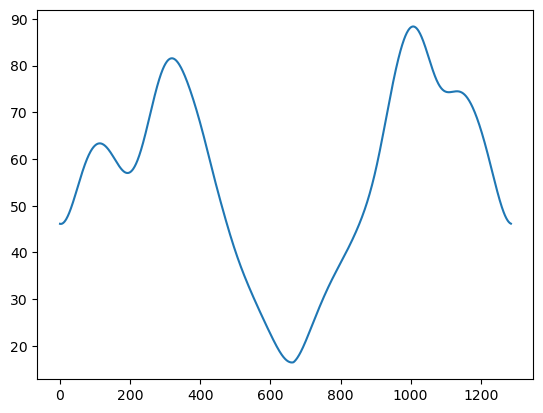

In [6]:
plt.plot(np.nanmean(speed[:,16:21], axis = 1))

/tmp/ipykernel_88967/1592524049.py:1: RuntimeWarning: Mean of empty slice
  plt.pcolor(np.nanmean(dataSST['SST2005'], axis = 2), cmap = 'jet', vmin = 12, vmax = 17)


(np.float64(0.0), np.float64(585.0), np.float64(0.0), np.float64(141.0))

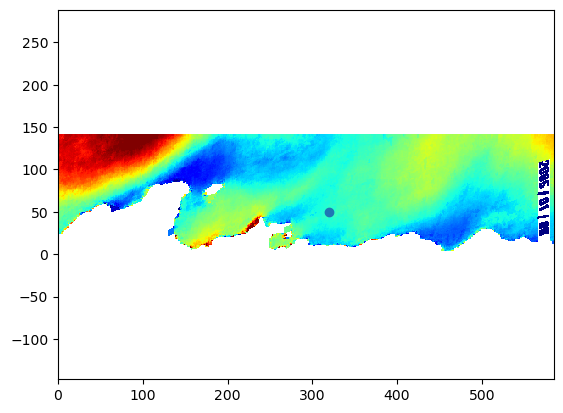

In [6]:
plt.pcolor(np.nanmean(dataSST['SST2005'], axis = 2), cmap = 'jet', vmin = 12, vmax = 17)
plt.plot(320,50, marker = 'o')
plt.axis('equal')

In [47]:
values, mask = extract_circle(dataX, x0, y0, radius)

In [48]:
values

array([  nan,   nan,   nan, ..., 14.85, 14.7 , 14.25])

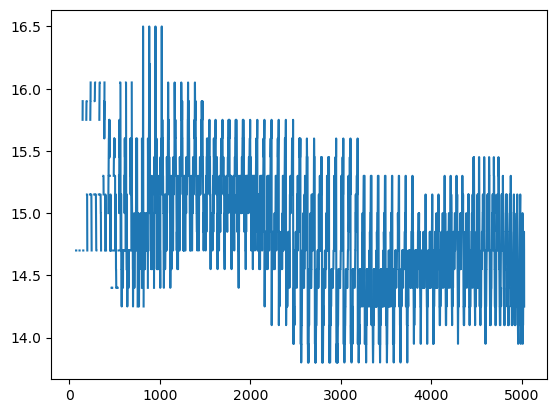

In [50]:
plt.plot(values)